## Setup

Import modules

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport
import sweetviz as sv

Define constants and import dataset

In [404]:
DATASET = '../udataset/filtered_stock_and_etfs.csv'

df = pd.read_csv(DATASET)

## Exploratory Data Analysis

Generate Profile report for the dataset using `ydata-profiling` library

Generate a profile report using the `sweetviz` library

Plot time series data of coca cola stock

Plot time series data of S&P500 index

## Create metric for growth

Convert the date column to date type

In [405]:
df['Date-Time'] = pd.to_datetime(df['Date-Time'])
df['YearMonth'] = df['Date-Time'].dt.to_period('M')

Sort the dataframe by ticker symbol and date

In [406]:
df = df.sort_values(by=['Ticker_Symbol', 'Date-Time'])

Get the monthly opening price for each stock and the opening price the previous month

In [407]:
month_open_prices = df.groupby(['Ticker_Symbol', 'YearMonth'])['Open'].first().reset_index()

month_open_prices['Prev_First_Open'] = month_open_prices.groupby('Ticker_Symbol')['Open'].shift(1)

Calculate the monthly growth for each stock

In [408]:
month_open_prices['Monthly_Growth (%)'] = ((month_open_prices['Open'] - month_open_prices['Prev_First_Open']) / month_open_prices['Prev_First_Open']) * 100

Calculate the cumulative monthly growth for each stock

In [409]:
month_open_prices['Cumulative_Growth (%)'] = month_open_prices.groupby('Ticker_Symbol')['Monthly_Growth (%)'].cumsum()

Drop the first row of each stock

In [410]:
growth = month_open_prices.dropna(subset=['Prev_First_Open'])
#growth['YearMonth']-=1

growth.to_csv('../udataset/stock_growth_month.csv', index=False)

## Plot growth for each symbol

/tmp/ipykernel_99938/3147209484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-pac

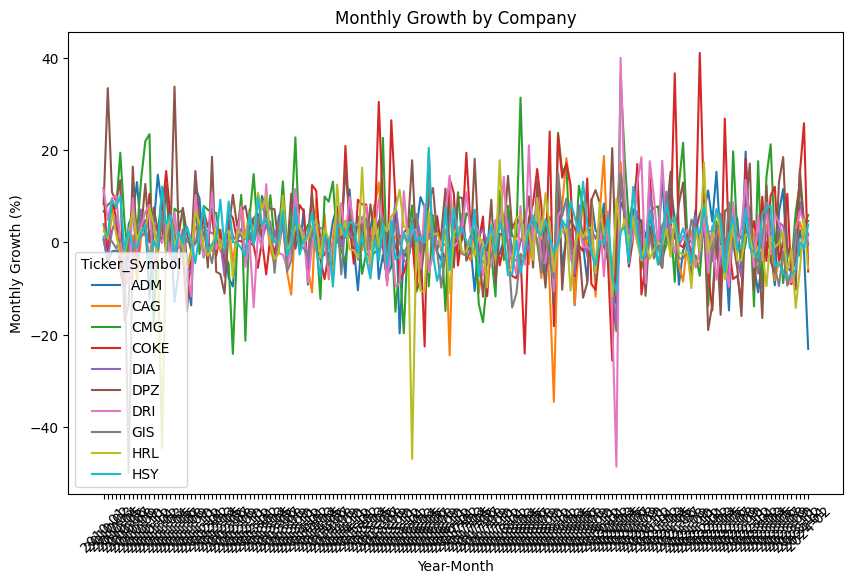

In [411]:
display_data = growth[growth['YearMonth'] >= pd.Period('2010-01')]

display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)

company_subset = display_data['Ticker_Symbol'].unique()[:10] # First 10 companies
plot_data = display_data[display_data['Ticker_Symbol'].isin(company_subset)]


plt.figure(figsize=(10, 6)) # TODO - Note that graph is not well labeled
sns.lineplot(data=plot_data, x='YearMonth_str', y='Monthly_Growth (%)', hue='Ticker_Symbol')
plt.xticks(rotation=45)
plt.title('Monthly Growth by Company')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Growth (%)')
plt.show()

In [412]:
MARKETCAP = '../udataset/market_cap.csv'
cap_df = pd.read_csv(MARKETCAP)

In [413]:
def get_market_cap(row):
    to_return = cap_df[(cap_df['beginning_year'] <= row['YearMonth']) & (cap_df['end_year'] >= row['YearMonth']) & (cap_df['ticker'] == row['Ticker_Symbol'])]['market_cap_M']
    to_return = np.array(to_return)

    if len(to_return) == 0:
        return pd.NA

    to_return = to_return[0]
    return to_return

In [414]:
cap_df['year'] = cap_df['year'].astype(str)
cap_df['beginning_year'] = cap_df['year'] +'-01-01'
cap_df['beginning_year'] = pd.to_datetime(cap_df['beginning_year'])
cap_df['beginning_year'] = cap_df['beginning_year'].dt.to_period('M')

cap_df['end_year'] = cap_df['year'] +'-12-31'
cap_df['end_year'] = pd.to_datetime(cap_df['end_year'])
cap_df['end_year'] = cap_df['end_year'].dt.to_period('M')

growth = growth[growth['YearMonth'] >= pd.Period('2010-01')]
growth['market_cap'] = growth.apply(get_market_cap, axis=1)

cap_df

,year,ticker,market_cap_M,beginning_year,end_year
0,2024,QSR,32360.0,2024-01,2024-12
1,2023,QSR,34880.0,2023-01,2023-12
2,2022,QSR,28920.0,2022-01,2022-12
3,2021,QSR,18950.0,2021-01,2021-12
4,2020,QSR,18540.0,2020-01,2020-12
...,...,...,...,...,...
393,2014,COKE,810.0,2014-01,2014-12
394,2013,COKE,670.0,2013-01,2013-12
395,2012,COKE,610.0,2012-01,2012-12
396,2011,COKE,530.0,2011-01,2011-12


In [415]:
growth['market_cap_growth'] = growth['market_cap']*growth['Monthly_Growth (%)']

In [416]:
growth

,Ticker_Symbol,YearMonth,Open,Prev_First_Open,Monthly_Growth (%),Cumulative_Growth (%),market_cap,market_cap_growth
122,ADM,2010-01,31.48,31.250,0.736000,146.566170,19160.0,14101.76
123,ADM,2010-02,30.07,31.480,-4.479034,142.087136,19160.0,-85818.297332
124,ADM,2010-03,29.49,30.070,-1.928833,140.158303,19160.0,-36956.434985
125,ADM,2010-04,28.97,29.490,-1.763310,138.394994,19160.0,-33785.011868
126,ADM,2010-05,28.23,28.970,-2.554367,135.840627,19160.0,-48941.66379
...,...,...,...,...,...,...,...,...
6223,YUM,2023-10,124.53,129.925,-4.152396,243.938298,36620.0,-152060.727343
6224,YUM,2023-11,121.88,124.530,-2.128001,241.810297,36620.0,-77927.407051
6225,YUM,2023-12,125.59,121.880,3.043978,244.854274,36620.0,111470.46275
6226,YUM,2024-01,129.73,125.590,3.296441,248.150715,38830.0,128000.796242


In [417]:
overall_growth = []
year_month = []
for year in range(2010, 2023):
    for month in range(1, 13):
        month_string = str(month)
        if len(month_string) == 1:
            month_string = '0' + month_string

        date_string = f'{str(year)}-{month_string}'
        year_month.append(date_string)

        overall_growth.append(growth[growth['YearMonth'] == pd.Period(date_string)]['market_cap_growth'].sum()/growth[growth['YearMonth'] == pd.Period(date_string)]['market_cap'].sum())

new_df = pd.DataFrame({'year-month': year_month, 'processed_food_growth': overall_growth, 'S&P_growth': growth[(growth['Ticker_Symbol'] == 'SPY') & (growth['YearMonth'] >= pd.Period('2010-01')) & (growth['YearMonth'] <= pd.Period('2022-12'))]['Monthly_Growth (%)']})
new_df['growth_diff'] = (new_df['S&P_growth'] - new_df['processed_food_growth'])/(((new_df['processed_food_growth'])+new_df['S&P_growth'])/2)
new_df

,year-month,processed_food_growth,S&P_growth,growth_diff
4436,2010-01,0.651375,1.307248,0.669729
4437,2010-02,-0.849910,-3.755451,1.261808
4438,2010-03,3.611805,2.820157,-0.246161
4439,2010-04,5.573013,5.935252,0.062953
4440,2010-05,2.912439,1.341256,-0.738738
...,...,...,...,...
4587,2022-08,5.996512,8.654663,0.362858
4588,2022-09,-1.862022,-3.974093,0.723793
4589,2022-10,-4.076488,-8.096414,0.660471
4590,2022-11,10.646213,8.048078,-0.277960


In [418]:
UNEMPLOYMENTDATA = '../udataset/unemployment_month_US.csv'
unemployment_df = pd.read_csv(UNEMPLOYMENTDATA)
unemployment_df.columns = unemployment_df.columns.str.strip()
unemployment_df.columns = unemployment_df.columns.str.lower()

In [419]:
#unemployment_rate = []
#for year in range(2010, 2023):
    #unemployment_rate.append(unemployment_df[unemployment_df['year'] == year]['estimate'].sum()/unemployment_df[unemployment_df['year'] == year]['labour_force_pop'].sum()*100)
    #unemployment_rate.append(unemployment_df[unemployment_df['year'] == year]['estimate'].sum())


In [420]:
#unemployment_rate = [9.63, 8.95, 8.07, 7.37, 6.17, 5.28, 4.87, 4.36, 3.90, 3.67, 8.05, 5.35, 3.61]
new_df = pd.merge(new_df, unemployment_df, on=['year-month'])
new_df = new_df.drop(columns = ['unnamed: 0'])
new_df
#print(new_df['unemployment_rate'].expanding().corr(new_df['S&P_growth']))

,year-month,processed_food_growth,S&P_growth,growth_diff,unemployment_rate
0,2010-01,0.651375,1.307248,0.669729,9.8
1,2010-02,-0.849910,-3.755451,1.261808,9.8
2,2010-03,3.611805,2.820157,-0.246161,9.9
3,2010-04,5.573013,5.935252,0.062953,9.9
4,2010-05,2.912439,1.341256,-0.738738,9.6
...,...,...,...,...,...
151,2022-08,5.996512,8.654663,0.362858,3.6
152,2022-09,-1.862022,-3.974093,0.723793,3.5
153,2022-10,-4.076488,-8.096414,0.660471,3.6
154,2022-11,10.646213,8.048078,-0.277960,3.6


In [421]:
print(new_df[new_df.columns[1:]].corr())
new_df['unemployment_rate'].expanding().corr(new_df['S&P_growth']).to_csv('../udataset/expanding_corr.csv')

                       processed_food_growth  S&P_growth  growth_diff  \
processed_food_growth               1.000000    0.763280    -0.016053   
S&P_growth                          0.763280    1.000000    -0.034747   
growth_diff                        -0.016053   -0.034747     1.000000   
unemployment_rate                   0.023693    0.041111     0.021168   

                       unemployment_rate  
processed_food_growth           0.023693  
S&P_growth                      0.041111  
growth_diff                     0.021168  
unemployment_rate               1.000000  


In [422]:
new_df.to_csv('../udataset/growth_vs_unemployment_month.csv')